<h1>Scikit Learn Intro</h1>

<h5>Data Standardization</h5>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


plt.rcParams['figure.figsize'] = [8, 6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')

titanic_data = titanic_data[["age", "fare", "pclass"]]
titanic_data.head()

C:\Users\JohnWork\AppData\Local\Temp\ipykernel_13520\2243727871.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,age,fare,pclass
0,22.0,7.2500,3
1,38.0,71.2833,1
2,26.0,7.9250,3
3,35.0,53.1000,1
4,35.0,8.0500,3


In [2]:
titanic_data.describe()

,age,fare,pclass
count,714.000000,891.000000,891.000000
mean,29.699118,32.204208,2.308642
std,14.526497,49.693429,0.836071
min,0.420000,0.000000,1.000000
25%,20.125000,7.910400,2.000000
50%,28.000000,14.454200,3.000000
75%,38.000000,31.000000,3.000000
max,80.000000,512.329200,3.000000


In [3]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(titanic_data)

titanic_data_scaled = scaler.transform(titanic_data)

In [4]:
titanic_data_scaled = pd.DataFrame(titanic_data_scaled, columns=titanic_data.columns)
titanic_data_scaled.head()

,age,fare,pclass
0,-0.530377,-0.502445,0.827377
1,0.571831,0.786845,-1.566107
2,-0.254825,-0.488854,0.827377
3,0.365167,0.420730,-1.566107
4,0.365167,-0.486337,0.827377


<Axes: xlabel='age', ylabel='Density'>

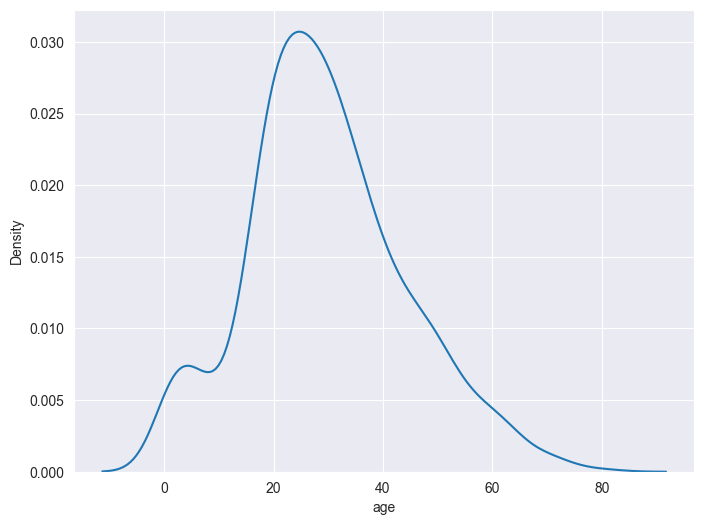

In [7]:
sns.kdeplot(titanic_data['age'])

<h5>Min and Max</h5>

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(titanic_data)

titanic_data_scaled = scaler.transform(titanic_data)

titanic_data_scaled = pd.DataFrame(titanic_data_scaled, columns=titanic_data.columns)
titanic_data_scaled.head()

,age,fare,pclass
0,0.271174,0.014151,1.0
1,0.472229,0.139136,0.0
2,0.321438,0.015469,1.0
3,0.434531,0.103644,0.0
4,0.434531,0.015713,1.0


<Axes: xlabel='age', ylabel='Density'>

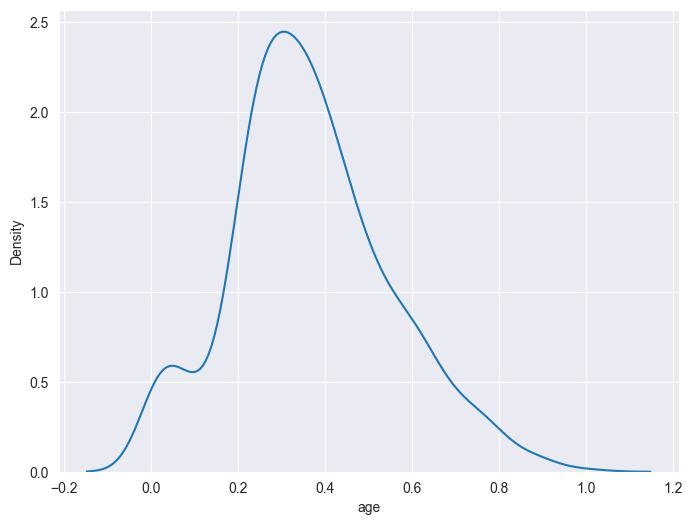

In [10]:
sns.kdeplot(titanic_data_scaled['age'])

<h5>Mean Normalization</h5>

In [6]:
mean_vals = titanic_data.mean(axis=0)
mean_vals

age       29.699118
fare      32.204208
pclass     2.308642
dtype: float64

<h5>Range of values</h5>

In [7]:
range_vals = titanic_data.max(axis=0) - titanic_data.min(axis=0)
range_vals

age        79.5800
fare      512.3292
pclass      2.0000
dtype: float64

<h5>Mean Normalization</h5>

In [9]:
titanic_data_scaled = (titanic_data - mean_vals) / range_vals

<Axes: xlabel='age', ylabel='Density'>

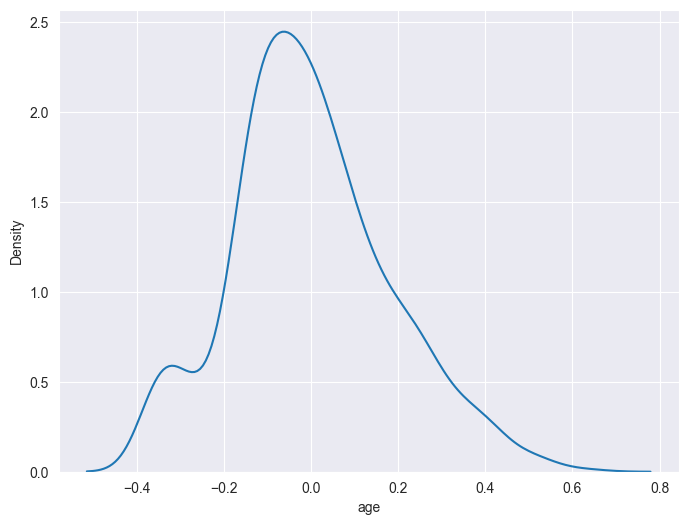

In [10]:
sns.kdeplot(titanic_data_scaled['age'])

<h5>Mean Or Median Imputation</h5>

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [8, 6]
sns.set_style('darkgrid')

titanic_data = sns.load_dataset('titanic')
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
median = titanic_data.age.median()
print(median)

mean = titanic_data.age.mean()
print(mean)

28.0
29.69911764705882


In [13]:
import numpy as np

titanic_data['Median_Age'] = titanic_data.age.fillna(median)

titanic_data['Mean_Age'] = titanic_data.age.fillna(mean)

titanic_data['Mean_Age'] = np.round(titanic_data['Mean_Age'], 1)

titanic_data.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Median_Age,Mean_Age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0,35.0
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,28.0,29.7
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,54.0,54.0
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,2.0,2.0
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,27.0,27.0
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,14.0,14.0


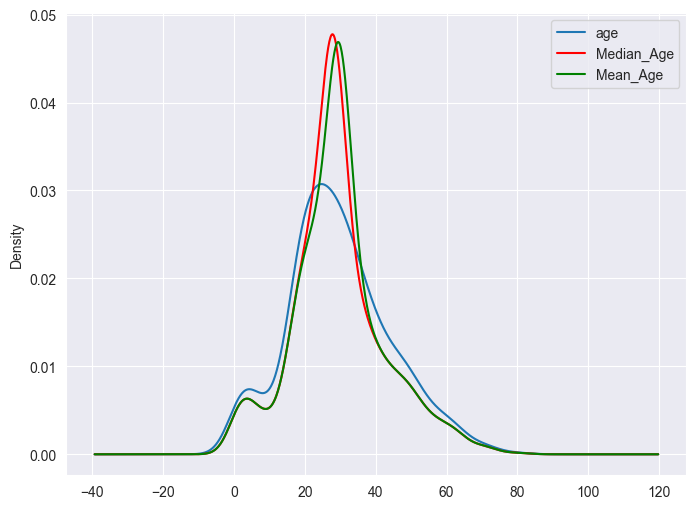

In [14]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 6]

fig = plt.figure()
ax = fig.add_subplot(111)

titanic_data['age'].plot(kind='kde', ax=ax)

titanic_data['Median_Age'].plot(kind='kde', ax=ax, color='red')

titanic_data['Mean_Age'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

<h5>End of Distribution Imputation</h5>

In [16]:
plt.rcParams['figure.figsize'] = [8, 6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset("titanic")

titanic_data = titanic_data[['survived', 'pclass', 'age', 'fare']]

titanic_data.isnull().mean()

survived    0.000000
pclass      0.000000
age         0.198653
fare        0.000000
dtype: float64

<Axes: >

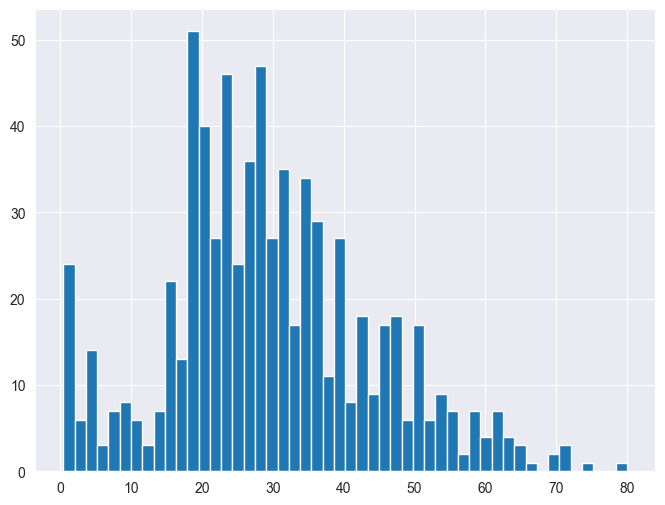

In [17]:
titanic_data.age.hist(bins=50)

In [18]:
eod_value = titanic_data.age.mean() + 3 * titanic_data.age.std()
print(eod_value)

73.27860964406094


In [19]:
import numpy as np

titanic_data['age_eod'] = titanic_data.age.fillna(eod_value)
titanic_data.head(20)

,survived,pclass,age,fare,age_eod
0,0,3,22.0,7.2500,22.00000
1,1,1,38.0,71.2833,38.00000
2,1,3,26.0,7.9250,26.00000
3,1,1,35.0,53.1000,35.00000
4,0,3,35.0,8.0500,35.00000
5,0,3,NaN,8.4583,73.27861
6,0,1,54.0,51.8625,54.00000
7,0,3,2.0,21.0750,2.00000
8,1,3,27.0,11.1333,27.00000
9,1,2,14.0,30.0708,14.00000


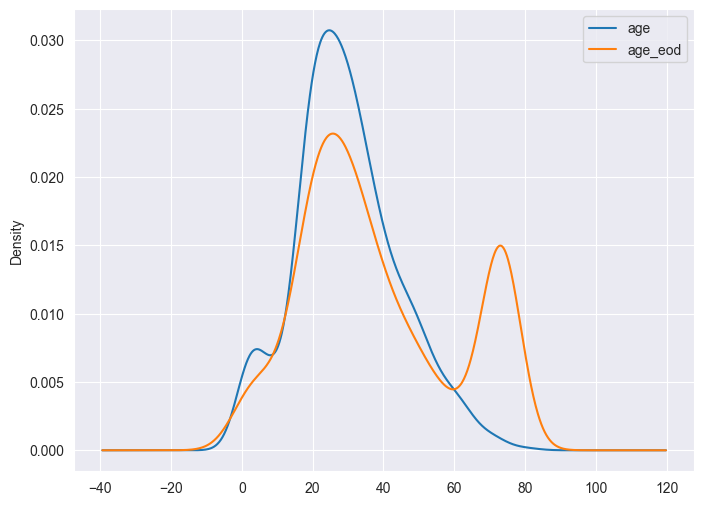

In [20]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 6]
fig = plt.figure()
ax = fig.add_subplot(111)

titanic_data['age'].plot(kind='kde', ax=ax)
titanic_data['age_eod'].plot(kind='kde', ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

<h5>Frequent Category Imputation</h5>

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [8, 6]
sns.set_style('darkgrid')

titanic_data = sns.load_dataset('titanic')

titanic_data = titanic_data[['embark_town', 'age', 'fare']]

titanic_data.head()
titanic_data.isnull().mean()

embark_town    0.002245
age            0.198653
fare           0.000000
dtype: float64

Text(0, 0.5, 'No Of Passengers')

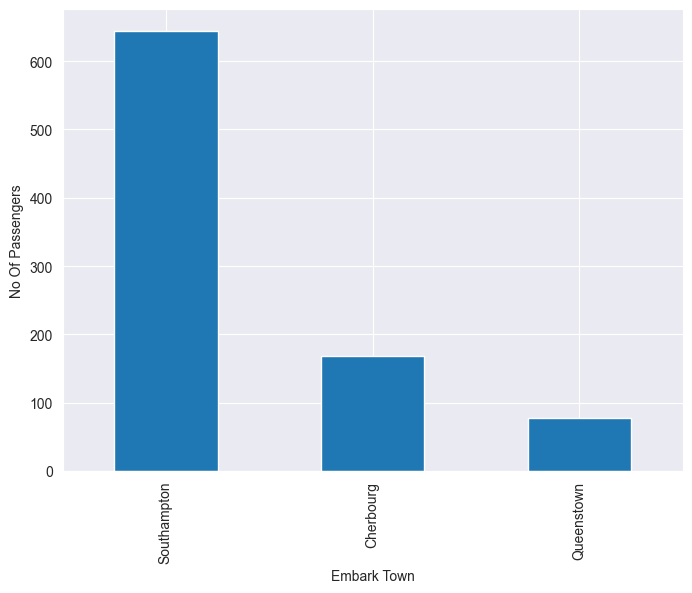

In [23]:
titanic_data.embark_town.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('Embark Town')
plt.ylabel('No Of Passengers')

In [24]:
titanic_data.embark_town.mode()

0    Southampton
Name: embark_town, dtype: object

In [25]:
titanic_data.embark_town.fillna('Southampton', inplace=True)

In [26]:
titanic_data.age.mode()

0    24.0
Name: age, dtype: float64

In [27]:
import numpy as np

titanic_data['age_mode'] = titanic_data.age.fillna(24)
titanic_data.head(20)

,embark_town,age,fare,age_mode
0,Southampton,22.0,7.2500,22.0
1,Cherbourg,38.0,71.2833,38.0
2,Southampton,26.0,7.9250,26.0
3,Southampton,35.0,53.1000,35.0
4,Southampton,35.0,8.0500,35.0
5,Queenstown,NaN,8.4583,24.0
6,Southampton,54.0,51.8625,54.0
7,Southampton,2.0,21.0750,2.0
8,Southampton,27.0,11.1333,27.0
9,Cherbourg,14.0,30.0708,14.0


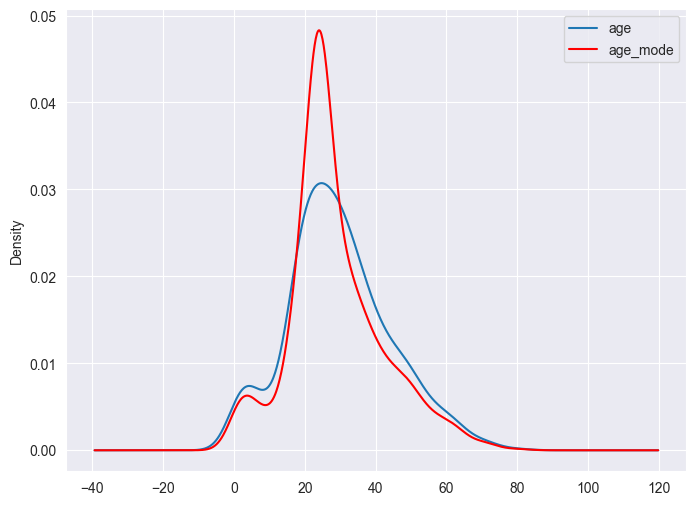

In [28]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 6]

fig = plt.figure()
ax = fig.add_subplot(111)

titanic_data['age'].plot(kind='kde', ax=ax)

titanic_data['age_mode'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()

ax.legend(lines, labels, loc='best')

<h5>Missing Category Imputation</h5>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [8, 6]
sns.set_style('darkgrid')

titanic_data = sns.load_dataset('titanic')

titanic_data = titanic_data[["embark_town", "age", "fare"]]
titanic_data.head()
titanic_data.isnull().mean()

embark_town    0.002245
age            0.198653
fare           0.000000
dtype: float64

In [4]:
titanic_data.embark_town.fillna('Missing', inplace= True)

Text(0, 0.5, 'No Of Passengers')

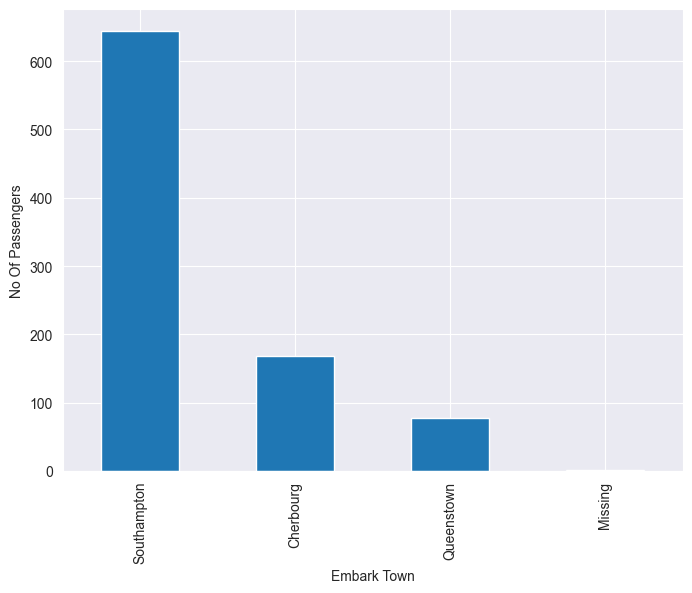

In [5]:
titanic_data.embark_town.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('Embark Town')
plt.ylabel('No Of Passengers')